<h1><center>Final Modeling</center></h1>
<hr>

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression, SGDClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [2]:
data  = pd.read_csv('./heart_failure_final.csv')
label = data['DEATH_EVENT']
data1 = data.drop(labels=['DEATH_EVENT'], axis=1)
data1.head()

,sex,anaemia,high_blood_pressure,smoking,diabetes,age_bin,creatinine_phosphokinase_bin,ejection_fraction_bin,platelates_bin,serum_creatinine_bin,serum_sodium_bin
0,1,0,1,0,0,4,3,0,3,5,2
1,1,0,0,0,0,2,7,1,3,2,3
2,1,0,0,1,0,3,1,0,1,3,1
3,1,1,0,0,0,2,1,0,2,5,3
4,0,1,0,0,1,3,1,0,4,6,0


In [3]:
#train test splitting of data

x_tr, x_te, y_tr, y_te = train_test_split(data1, label, test_size=0.10, stratify=label, random_state=47)

In [4]:
print("Train Data : {0}".format(x_tr.shape))
print("Test  Data : {0}".format(x_te.shape))

Train Data : (269, 11)
Test  Data : (30, 11)


In [5]:
#standardizing the data : mean = 0 and getting the std. deviation
std = StandardScaler()
std.fit(x_tr)
norm_x_tr = std.transform(x_tr)
norm_x_te = std.transform(x_te)

In [6]:
def plot_confusion_matrix(actual, predicted):
    """
    for plotting confusion matrix
    """
    C = confusion_matrix(actual, predicted) #confusion matrix
    A = ((C.T)/(C.sum(axis=1))).T           #recall matrix    (row sum=1)
    B = (C/C.sum(axis=0))                   #precision matrix (col sum=1)
    plt.figure(figsize=(18, 5))
    labels = list(range(2))
    
    ax1=plt.subplot(131)
    #print('-'*10, 'Confusion Matrix', '-'*10)
    #plt.figure(figsize=(5, 4))
    sns.heatmap(C, annot=True, cmap='YlGnBu', fmt='.3f', xticklabels=labels, yticklabels=labels, ax=ax1)
    ax1.set_title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    
    ax2=plt.subplot(132)
    #print('-'*10, 'Precision Matrix (ColSum=1)', '-'*10)#B
    #plt.figure(figsize=(5, 4))
    sns.heatmap(B, annot=True, cmap='YlGn', fmt='.3f', xticklabels=labels, yticklabels=labels, ax=ax2)
    ax2.set_title('Precision Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    
    ax3=plt.subplot(133)
    #print('-'*10, 'Recall Matrix (RowSum=1)', '-'*10)#A
    #plt.figure(figsize=(5, 4))
    sns.heatmap(A, annot=True, cmap='YlOrBr', fmt='.3f', xticklabels=labels, yticklabels=labels, ax=ax3)
    ax3.set_title('Recall Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.show()

In [7]:
alpha_range = [ 10**i for i in range(-6, 4) ]

weight_0 = len([ x for x in label if x==0 ])/data.shape[0]
weight_1 = len([ x for x in label if x==1 ])/data.shape[0]

## Training Logistic Regression

In [8]:
performance = list()
for alpha in alpha_range:
    lr_clf = SGDClassifier(loss='log', penalty='l2', alpha=alpha, random_state=27)
    lr_clf.fit(norm_x_tr, y_tr)
    #cv prediction
    te_pred     = lr_clf.predict(norm_x_te)
    te_f1_score = round(f1_score(y_te, te_pred), 4)
    performance.append(te_f1_score)
    print("For Alpha={:6}, f1-score was found to be {:6}".format(alpha, te_f1_score))

best_alpha = alpha_range[np.argmax(performance)]
#best_alpha = 1
print("\n\nBest f1-score was found to be for Alpha={0}, with value to be {1}"\
      .format(best_alpha, max(performance)))

For Alpha= 1e-06, f1-score was found to be 0.6316
For Alpha= 1e-05, f1-score was found to be 0.4348
For Alpha=0.0001, f1-score was found to be 0.4211
For Alpha= 0.001, f1-score was found to be 0.4706
For Alpha=  0.01, f1-score was found to be 0.5556
For Alpha=   0.1, f1-score was found to be 0.5556
For Alpha=     1, f1-score was found to be    0.0
For Alpha=    10, f1-score was found to be    0.0
For Alpha=   100, f1-score was found to be    0.0
For Alpha=  1000, f1-score was found to be    0.0


Best f1-score was found to be for Alpha=1e-06, with value to be 0.6316


Model performance on Test data found to be 76.6667% 




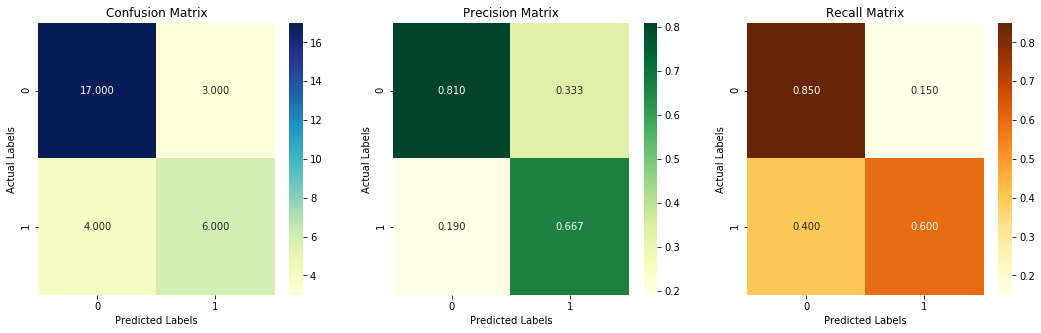

In [9]:
lr_clf = SGDClassifier(loss='log', penalty='l2', alpha=best_alpha, random_state=27)
lr_clf.fit(norm_x_tr, y_tr)

tr_f1_score = round(f1_score(y_tr, lr_clf.predict(norm_x_tr)), 4)
tr_accuracy = round(accuracy_score(y_tr, lr_clf.predict(norm_x_tr))*100, 4)

te_f1_score = round(f1_score(y_te, lr_clf.predict(norm_x_te)), 4)
te_accuracy = round(accuracy_score(y_te, lr_clf.predict(norm_x_te))*100, 4)

print("Model performance on Test data found to be {:6}% \n\n".format(te_accuracy))

plot_confusion_matrix(y_te, lr_clf.predict(norm_x_te))

# Finalizing Model

In [10]:
def bin_age(age):
    if age<40:        return 0
    elif (age>=40) and (age<50):        return 1
    elif (age>=50) and (age<60):        return 2
    elif (age>=60) and (age<70):        return 3
    elif (age>=70) and (age<80):        return 4
    elif (age>=80) and (age<90):        return 5
    else:        return 6

def bin_creatinine_phosphokinase(creatinine):
    if creatinine<0:        return 0
    elif (creatinine>=0) and (creatinine<200):        return 1
    elif (creatinine>=200) and (creatinine<400):        return 2
    elif (creatinine>=400) and (creatinine<600):        return 3
    elif (creatinine>=600) and (creatinine<800):        return 4
    elif (creatinine>=800) and (creatinine<1000):        return 5
    elif (creatinine>=1000) and (creatinine<1200):        return 6
    else:        return 7

def bin_ef(x):
    if x<=35:        return 0
    elif (x>35) and (x<=39):        return 1
    elif (x>39) and (x<=54):        return 2
    elif (x>54) and (x<=70):        return 3
    else:        return 4

def bin_platelates(x):
    if x<=100000:        return 0
    elif (x>100000) and (x<=200000):        return 1
    elif (x>200000) and (x<=250000):        return 2
    elif (x>250000) and (x<=300000):        return 3
    elif (x>300000) and (x<=400000):        return 4
    else:        return 5

def bin_serum_creatinine(x):
    if x<0.8:        return 0
    elif (x>=0.8) and (x<1):        return 1
    elif (x>=1) and (x<1.2):        return 2
    elif (x>=1.2) and (x<1.4):        return 3
    elif (x>=1.4) and (x<1.6):        return 4
    elif (x>=1.6) and (x<2):        return 5
    elif (x>=2) and (x<3):        return 6
    elif (x>=3) and (x<5):        return 7
    else:        return 8

def bin_serum_sodium(x):
    if x<125:        return 0
    elif (x>=125) and (x<130):        return 1
    elif (x>=130) and (x<135):        return 2
    elif (x>=135) and (x<140):        return 3
    elif (x>=140) and (x<145):        return 4
    elif (x>=145) and (x<150):        return 5
    else:        return 6

In [15]:
def train():
    data   = pd.read_csv('./heart_failure_clinical_records_dataset.csv')
    #converting continuour variables into categorical
    data['age_bin']                      = data['age'].map(bin_age)
    data['creatinine_phosphokinase_bin'] = data['creatinine_phosphokinase'].map(bin_creatinine_phosphokinase)
    data['ejection_fraction_bin']        = data['ejection_fraction'].map(bin_ef)
    data['platelates_bin']               = data['platelets'].map(bin_platelates)
    data['serum_creatinine_bin']         = data['serum_creatinine'].map(bin_serum_creatinine)
    data['serum_sodium_bin']             = data['serum_sodium'].map(bin_serum_sodium)
    #making data ready
    final_data = data[['sex', 'anaemia', 'high_blood_pressure', 'smoking', 'diabetes', \
                       'age_bin', 'creatinine_phosphokinase_bin', 'ejection_fraction_bin', \
                       'platelates_bin', 'serum_creatinine_bin', 'serum_sodium_bin', 'DEATH_EVENT']]
    labels = final_data['DEATH_EVENT']
    data1  = final_data.drop(labels=['DEATH_EVENT'], axis=1)
    #standardizing the data
    std        = StandardScaler().fit(data1)
    norm_data1 = std.transform(data1)
    
    #training the model
    from sklearn.metrics import f1_score
    from sklearn.linear_model import SGDClassifier
    alpha_range = [ 10**x for x in range(-6, 5) ]
    
    #finding best alpha
    performance = list()
    for alpha in alpha_range:
        log_reg = SGDClassifier(loss='log', penalty='l2', alpha=alpha, random_state=27)
        log_reg.fit(norm_data1, labels)
        preds   = log_reg.predict(norm_data1)
        score   = round(f1_score(labels, preds), 5)
        performance.append(score)
        print("Alpha = {0} :: f1-score = {1}".format(str(alpha).ljust(7, ' '), str(te_f1_score).ljust(7, ' ')))
    #finding best alpha
    best_alpha = alpha_range[np.argmax(performance)]
    print("\nBest Alpha = {0}, with f1-score = {1}".format(str(best_alpha).ljust(7, ' '), str(max(performance)).ljust(7, ' ')))
    #final fitting of data
    log_reg = SGDClassifier(loss='log', penalty='l2', alpha=best_alpha, random_state=27)
    log_reg.fit(norm_data1, labels)
    #saving model
    import pickle
    import os
    pickle.dump(log_reg, open('HeartFailure_LogisticRegression.sav', 'wb'))
    if os.path.exists('HeartFailure_LogisticRegression.sav'):
        print("File stored successfully in ' {0} '.".format(os.getcwd()))
        return std
    else:
        print("Error saving model. Please Re-train the same.")
        return 0

In [54]:
def test(fresh_point, std, isRaw=False):
    import os
    import pickle
    columns = ['sex', 'anaemia', 'high_blood_pressure', 'smoking', 'diabetes', \
               'age_bin', 'creatinine_phosphokinase_bin', 'ejection_fraction_bin', \
               'platelates_bin', 'serum_creatinine_bin', 'serum_sodium_bin']
    expected_output = {0:' Absent ', 1:' Present '}
    if isRaw:
        cat_features  = fresh_point[:5]
        age_bin       = bin_age(fresh_point[5])
        cp_bin        = bin_creatinine_phosphokinase(fresh_point[6])
        ef_bin        = bin_ef(fresh_point[7])
        platlates_bin = bin_platelates(fresh_point[8])
        sc_bin        = bin_serum_creatinine(fresh_point[9])
        ss_bin        = bin_serum_sodium(fresh_point[10])
        fresh_point   = np.array(cat_features.extend([age_bin, cp_bin, ef_bin, platelates_bin, sc_bin, ss_bin]))
    #standardizing the prediction point
    final_point   = std.transform(np.array(fresh_point).reshape(-1, 1).T)
    if os.path.exists('HeartFailure_LogisticRegression.sav'):
        print("Loading saved model from ' {0} '.".format(os.getcwd()))
        log_reg    = pickle.load(open('HeartFailure_LogisticRegression.sav', 'rb'))
        prediction = int(log_reg.predict(final_point.reshape(-1, 1).T))
        print("\n\nRisk of heart failure is ", expected_output[prediction])
        weights    = log_reg.coef_ * final_point.reshape(-1, 1).T
        print("\nFeature Importance (Inreasing to Decreasing)::: ")
        for line in (sorted(list(zip(columns, weights[0])), reverse=True, key=lambda x:x[1])):
            f, v = line
            #print(line)
            print("Feature ::: {:30}   {:10}".format(f, round(v, 5)))
    else:
        print("Error saving model. Please Re-train the same.")

## Testing the flow

In [13]:
data  = pd.read_csv('./heart_failure_final.csv')
label = data['DEATH_EVENT']
data1 = data.drop(labels=['DEATH_EVENT'], axis=1)

x_tr, x_te, y_tr, y_te = train_test_split(data1, label, test_size=0.10, stratify=label, random_state=47)

#### Training Stage

In [16]:
return_status = train()

Alpha = 1e-06   :: f1-score = 0.6316 
Alpha = 1e-05   :: f1-score = 0.6316 
Alpha = 0.0001  :: f1-score = 0.6316 
Alpha = 0.001   :: f1-score = 0.6316 
Alpha = 0.01    :: f1-score = 0.6316 
Alpha = 0.1     :: f1-score = 0.6316 
Alpha = 1       :: f1-score = 0.6316 
Alpha = 10      :: f1-score = 0.6316 
Alpha = 100     :: f1-score = 0.6316 
Alpha = 1000    :: f1-score = 0.6316 
Alpha = 10000   :: f1-score = 0.6316 

Best Alpha = 1e-05  , with f1-score = 0.56322
File stored successfully in ' K:\Coding\Kaggle\HeartFailureClinicalData '.


#### Evaluation Stage

In [53]:
if return_status != 0:
    sample = x_te.iloc[0,:]
    test(sample, return_status)

Loading saved model from ' K:\Coding\Kaggle\HeartFailureClinicalData '.
Risk of heart failure is   Absent 

Feature Importance ::: 
Feature ::: anaemia                             5.68099
Feature ::: age_bin                             4.35355
Feature ::: serum_sodium_bin                   -0.33339
Feature ::: platelates_bin                     -1.55121
Feature ::: diabetes                            -2.2837
Feature ::: creatinine_phosphokinase_bin       -4.02197
Feature ::: high_blood_pressure                -4.36288
Feature ::: sex                                -5.81574
Feature ::: smoking                            -8.72912
Feature ::: ejection_fraction_bin             -14.72836
Feature ::: serum_creatinine_bin              -37.32278
